<h1>Introduction</h1>



This notebook is divided into six major parts:
<ol>
    <li>Introduction</li>
    <li>Data Description</li>
    <li>Exploratory Data Analyis or EDA (in short)</li>
    <li>Data Pre-Processing</li>
    <li>Modeling</li>
</ol>
Following the famous data science mantra we will spending the majority of our time in EDA and preprocessing compared to Modeling in a 80:20 ratio.


<h2>Data Description</h2>

The files given are:

1. train.csv: This is the dataset that we are gonna use to train our model to give predictions. SalePrice is theproperty's sale price in dollars. This is the target variable that we are trying to predict.
2. test.csv:The test set will be used to see how well our model performs on unseen data. For the test set, we do not provide the Target variable i.e, SalePrice. It is our job to predict these outcomes. For each passenger in the house, we use the model that we trained to predict the price of the house.
3. data_description.txt - This gives us the full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.
4. sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms. This serves as an example of how our submission should look like.

<h2>Importing the Libraries</h2>

This is where the actual fun begins. We start off by importing all the libraries that we will need later on. We will be using Numpy and pandas for data analysis and matplotlib (Matlab for python), seaborn for data visualisation. Below I have given the steps to load the data onto varibles.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Any results you write to the current directory are saved as output.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
%matplotlib inline

In [4]:
# This is how we assign the datasets to variables in python using pandas.
train=pd.read_csv("D:\\Imarticus\\Python\\Project\\train.csv")
test=pd.read_csv("D:\\Imarticus\\Python\\Project\\test.csv")

<h2>Exploratory Data Analysis</h2>

We will use the .head() function to display the first five columns of the dataset to get a feel of the dataset.

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#info gives us information about index and column data types.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop we the 'Id' column since it's unnecessary for the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [8]:
#This gives us the statistical summary of the dataset
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A plot to visualise the Target Distribution. Since this plot is right skewed we will later on transform this into a normal distribution in the preprocessing section.

C:\Users\Pranit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


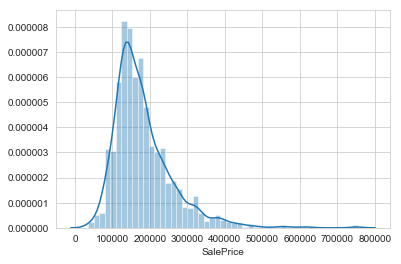

In [9]:
sns.set_style("whitegrid")
sns.distplot(train['SalePrice'])

Here we are plotting the Target varible against the GrLivArea which is Above grade (ground) living area in square feet. From this we can understand that "GrLivArea" and "SalePrice" has a linear relationship.

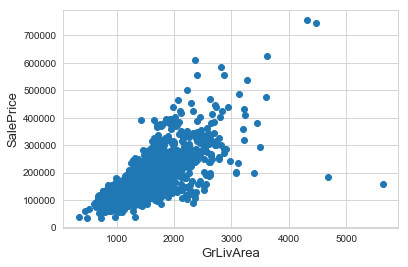

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

This is a plot of the Target variable against the TotalBsmtSF which is Total square feet of basement area. From the plot we can tell that 'SalePrice' and 'TotalBsmtSF' have a strong linear or exponential relationship.

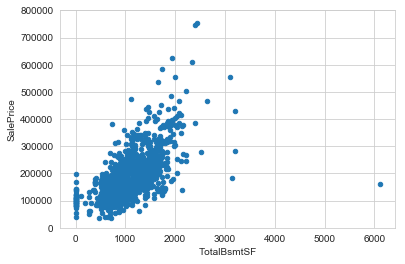

In [11]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

This is the plot of the Target Variable against the 'OverallQual' variable which is the Overall material and finish quality. From this we can deduce that as the Overall quality increases so does the house price.

(-0.5, 9.5, 0, 800000)

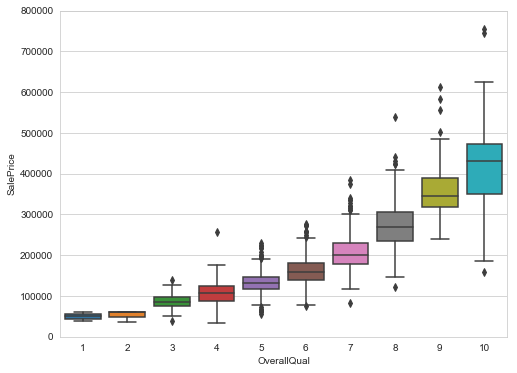

In [12]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

This plot is of the 'YearBuilt' feature against the Target variable. The 'YearBuilt' feature contains the original construction date. It isn't that clear but we can say that 'SalePrice' is more to spend money in new stuff than old.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

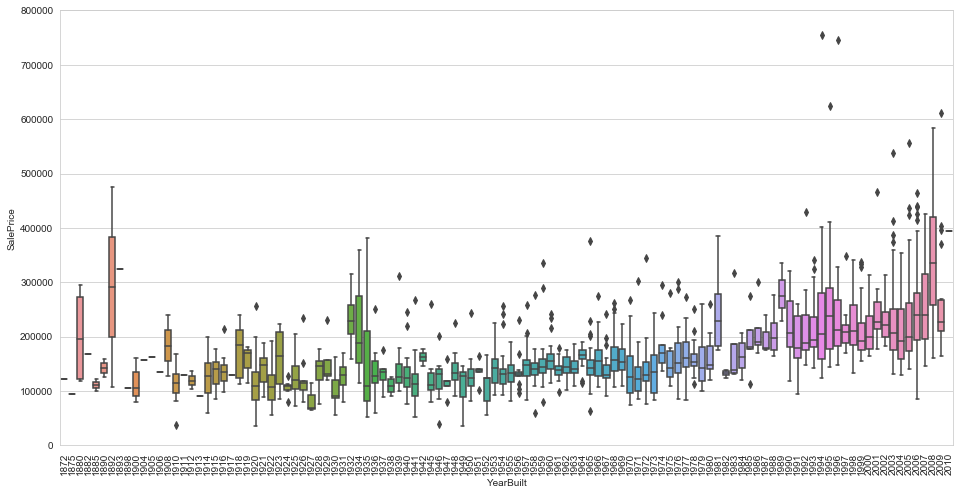

In [13]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

Let us plot the correlation matrix using heatmap to better understand the data.

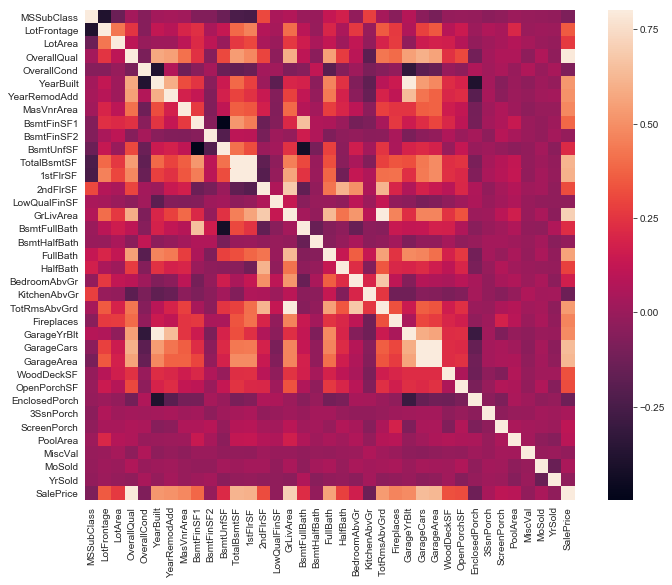

In [14]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

From the above heatmap we can find that some predictors are strongly correlated to each other thus causing multicollinearity. Some of them are 'TotalBsmtSF' and '1stFlrSF' and the Garage variables. Now let us plot a correlation matrix against 'SalePrice'. 

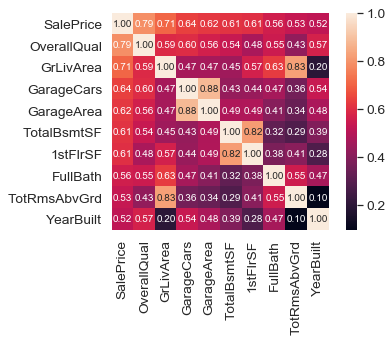

In [15]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


From this we can tell that "OverallQual",'GrLivArea','TotalBsmtSF' are strongly correlated to the target variable.<br> <br>
'GarageCars' and 'GarageArea' are strongly correlated to the Target variable too but since we know that the number of cars that fit in a garage is proportional to the 'GarageArea' we can just use one of these variables instead of all the Garage variables.<br><br>
'ToalBsmtSF' and '1stFloor' are strongly correlated to each other so we can just use only one of them or combine them. The same thing can be done to 'TotRmsAbvGrd' and 'GrLivArea' 

<h1>Preprocessing</h1>

<h3>Outliers</h3>

From the below plot we can see two huge outliers GrLivArea that are of a low price present in the bottom right corner. Since these are huge outliers it is safe to delete them as it negatively affects our model.

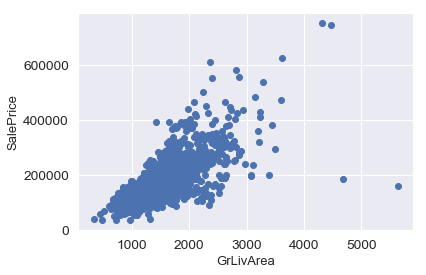

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

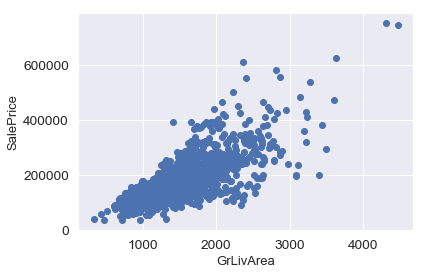

In [17]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

As already mentioned in the EDA section when we explored the Target Variable we need to transform this variable to make it more normally distributed. This is because linear models work well with normally distributed data.


 mu = 12.02 and sigma = 0.40



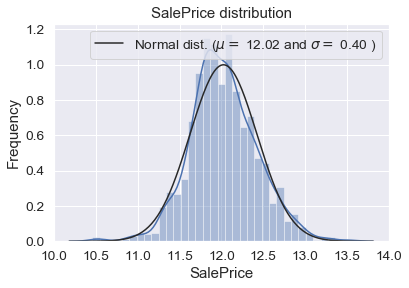

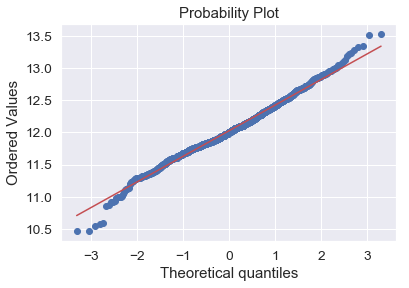

In [18]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We are gonna concatenate the train and test data so that it will be easier to make adjustments to the combined data than to individually do it for train and test dataset.

In [19]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


<h3>Missing Values</h3>
<br>
Let us look at the percentage of the missing values of the dataset.

In [20]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


Time to impute the missing values onto the features.

<ul>
    <li>We will impute the Nan or null values of 'PoolQC' with None as null values signify that the majority of the houses don't have a Pool.</li>
</ul>

In [21]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

<ul>
    <li>We will impute the Nan or null values of 'MiscFeature' with None as null values signify that the house does not contain miscellaneous Features.</li>
</ul>

In [22]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

<ul>
    <li>We will impute the Nan or null values of 'Alley' which refers to type of Alley access with None as null values signify that the house does not contain any Alley access.</li>
</ul>

In [23]:
all_data["Alley"] = all_data["Alley"].fillna("None")

<ul>
    <li>We will impute the Nan or null values of 'Fence' with None as null values signify that the house does not contain any Fences.</li>
</ul>

In [24]:
all_data["Fence"] = all_data["Fence"].fillna("None")

<ul>
    <li>We will impute the Nan or null values of 'FireplaceQu' with None as null values signify that the house does not contain any fireplace.</li>
</ul>

In [25]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

<ul>
    <li>We will impute the Nan or null values of 'LotFrontage' with median values taking into consideration that the area of each street connected to the house property is most likely similar to other houses of the Neighborhood.</li>
</ul>

In [26]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

<ul><li>We replace the 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' missing values into None signifying that those homes most likely don't have any garage for vehicles.</li></ul>

In [27]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

<ul><li>We replace the null values of 'GarageYrBlt', 'GarageArea', 'GarageCars' as no garage equals no cars.</li></ul>

In [28]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

<ul><li>The missing values of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are filled with zero because the null values most likely signifies no basement.</li></ul>

In [29]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

<ul><li>The missing values'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2 are filled with Nonne as NaN values signifies no basement.</li></ul>

In [30]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

<ul><li>The NA values of "MasVnrType" and "MasVnrArea" refer to no masonry veneer for these houses. Therefore the Area can be imputed with zero and the type can be imputed with None.</li></ul>

In [31]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

<ul><li>The 'MSZoning' refers to the general zoning classification. We fill the NaN values with 'RL' which is the most occurring value.</li></ul>

In [32]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

<ul><li>Most of the values of this feature are "AllPub" except for one "NoSeWa" and 2 NA. Since the house with "NoSewa' is present in the training set, this feature is not helpful in predictive modeling so we drop it. </li></ul>

In [33]:
all_data = all_data.drop(['Utilities'], axis=1)

<ul><li>The NA values means typical which is mentioned in the data description.</li></ul>

In [34]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

<ul><li>There is only one NA value present here in "Electrical" so we impute it 'SBrkr' since it is the most occurring value.</li></ul>

In [35]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

<ul><li>There is only one NA value present here in "KitchenQual" so we impute it 'TA' since it is the most occurring value.</li></ul>

In [36]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

<ul><li>There is only one NA value present in both Exterior1st and Exterior2nd so we fill it with the most frequent string.</li></ul>

In [37]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

<ul><li>Fill it again with the most frequent which is "WD" in this case.</li></ul>

In [38]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

<ul><li>The NA values here refers to No Building class so we fill it with None.</li></ul>

In [39]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [40]:
all_data.isnull().sum().max()

0

With this we no longer have any missing values. 

<h3>Transforming Categorical Variables</h3>

We now transform a few numerical variables that are categorical then we perform label encoding onto them.

In [41]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [42]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


So we create a new feature that plays an important role in predicting house prices which is the sum of total area of basement, first and second floors of each house.

In [43]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [44]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


We find the skewed features and then perform Box Cox Transformation of highly skewed features.

In [45]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [46]:
#Getting dummy categorical features.
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [50]:
#Splitting the data back into test and train
train = all_data[:ntrain]
test = all_data[ntrain:]

In [51]:
train.shape, test.shape

((1458, 220), (1459, 220))